In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Video_Games_Sales.csv')


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

## Data Analysis

#### Missing Values Show the missing values distribution:

Year_of_Release                              float64
NA_Sales                                     float64
EU_Sales                                     float64
JP_Sales                                     float64
Other_Sales                                  float64
Global_Sales                                 float64
Platform_XB                                  float64
Platform_X360                                float64
Platform_XOne                                float64
Platform_PC                                  float64
Platform_PS                                  float64
Platform_PS2                                 float64
Platform_PS3                                 float64
Platform_PS4                                 float64
Platform_PSP                                 float64
Platform_PSV                                 float64
Platform_GB                                  float64
Platform_GBA                                 float64
Platform_DS                                  f

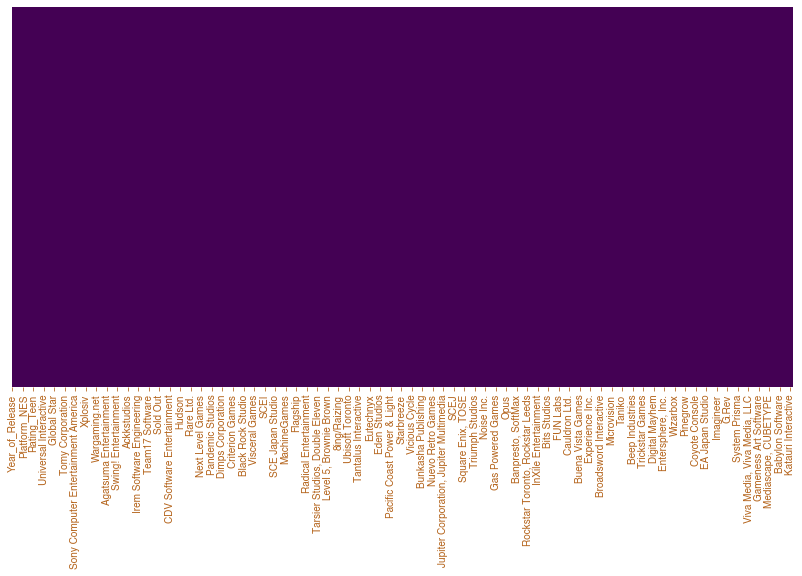

In [217]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['Global_Sales_Log'] = np.log1p(df['Global_Sales'])

df['NA_Sales_Log'] = np.log1p(df['NA_Sales'])
df['EU_Sales_Log'] = np.log1p(df['EU_Sales'])
df['JP_Sales_Log'] = np.log1p(df['JP_Sales'])
df['Other_Sales_Log'] = np.log1p(df['Other_Sales'])

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


In [186]:
# we can see there are lots of missing values in Critic_Score, Critic_Count,
#User_Score etc. While there are ONLY TWO missing in Name and Genre.

# Data Cleaning

                       column_name  percent_missing
Name                          Name              0.0
Platform                  Platform              0.0
Year_of_Release    Year_of_Release              0.0
Genre                        Genre              0.0
Publisher                Publisher              0.0
NA_Sales                  NA_Sales              0.0
EU_Sales                  EU_Sales              0.0
JP_Sales                  JP_Sales              0.0
Other_Sales            Other_Sales              0.0
Global_Sales          Global_Sales              0.0
Critic_Score          Critic_Score              0.0
Critic_Count          Critic_Count              0.0
User_Score              User_Score              0.0
User_Count              User_Count              0.0
Rating                      Rating              0.0
Global_Sales_Log  Global_Sales_Log              0.0
NA_Sales_Log          NA_Sales_Log              0.0
EU_Sales_Log          EU_Sales_Log              0.0
JP_Sales_Log

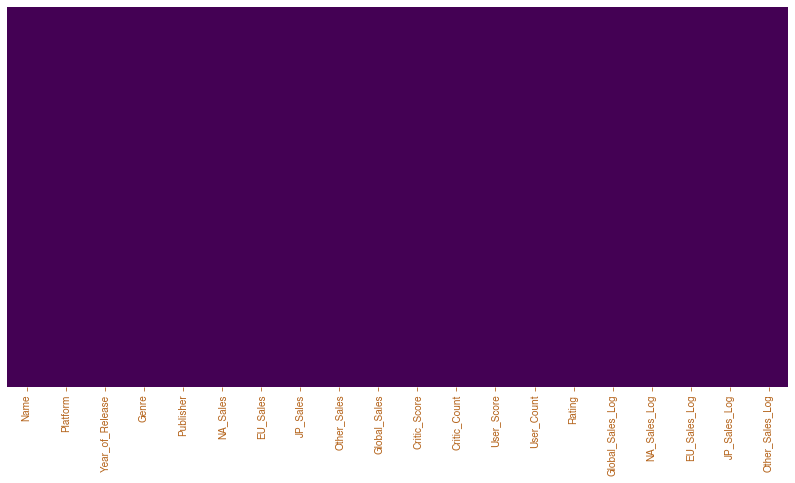

In [187]:
df.drop(index=[659,14246],inplace=True)
df[df.Year_of_Release.isnull()]
df.Year_of_Release = df.Year_of_Release.fillna(0)
df[df['Year_of_Release']==0].Platform.unique()

PS2_median = df[df['Platform'] == 'PS2']['Year_of_Release'].median()
Wii_median = df[df['Platform'] == 'Wii']['Year_of_Release'].median()
x2600median = df[df['Platform'] == '2600']['Year_of_Release'].median()
X360_median = df[df['Platform'] == 'X360']['Year_of_Release'].median()
GBA_median = df[df['Platform'] == 'GBA']['Year_of_Release'].median()
PC_median = df[df['Platform'] == 'PC']['Year_of_Release'].median()
PS3_median = df[df['Platform'] == 'PS3']['Year_of_Release'].median()
PS_median = df[df['Platform'] == 'PS']['Year_of_Release'].median()
PSP_median = df[df['Platform'] == 'PSP']['Year_of_Release'].median()
XB_median = df[df['Platform'] == 'XB']['Year_of_Release'].median()
GB_median = df[df['Platform'] == 'GB']['Year_of_Release'].median()
DS_median = df[df['Platform'] == 'DS']['Year_of_Release'].median()
x3DS_median = df[df['Platform'] == '3DS']['Year_of_Release'].median()
N64_median = df[df['Platform'] == 'N64']['Year_of_Release'].median()
PSV_median = df[df['Platform'] == 'PSV']['Year_of_Release'].median()
GC_median = df[df['Platform'] == 'GC']['Year_of_Release'].median()


# Function that returns the median of the platform if year = 0. Else it returns the year.
def year_filler(x):
    
    if x.Year_of_Release == 0:
        if x.Platform == 'PS2':
            return PS2_median
        elif x.Platform == 'Wii':
            return Wii_median
        elif x.Platform == '2600':
            return x2600median
        elif x.Platform == 'X360':
            return X360_median
        elif x.Platform == 'GBA':
            return GBA_median
        elif x.Platform == 'PC':
            return PC_median
        elif x.Platform == 'PS3':
            return PS3_median
        elif x.Platform == 'PS':
            return PS_median
        elif x.Platform == 'PSP':
            return PSP_median
        elif x.Platform == 'XB':
            return XB_median
        elif x.Platform == 'GB':
            return GB_median
        elif x.Platform == 'DS':
            return DS_median
        elif x.Platform == '3DS':
            return x3DS_median
        elif x.Platform == 'N64':
            return N64_median
        elif x.Platform == 'PSV':
            return PSV_median
        elif x.Platform == 'GC':
            return GC_median
        else:
            return 1900
    else:
        return x.Year_of_Release
    
    
# apply function to replace values
df.Year_of_Release = df.apply(year_filler, axis=1)

df['Publisher'].fillna(value='Unknown', inplace=True)
# We will start by filling the missing values of Critic_Score and Critic_Count.
df.Critic_Score = df.Critic_Score.fillna(df.Critic_Score.median())
df.Critic_Count = df.Critic_Count.fillna(df.Critic_Count.median())

# We will start by filling the missing values of Critic_Score and Critic_Count.
# Because Critic_Score has NaN values, we will first fill those NaN values with 0.

df.User_Score = df.User_Score.fillna(0)


# Some values of Critic_Score have the value'tbd'. These values need to be replaces with 100. 
df.User_Score.replace(to_replace='tbd',value=100,inplace=True)

# We will do the same for User_Count
df.User_Count = df.User_Count.fillna(df.User_Count.median())

# Replace the missing values of Rating with Unknown.
df.Rating.fillna('Unknown',inplace=True)

# Because Developer has too many unique values, we will drop this column.
df.drop('Developer',axis=1,inplace=True)

columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)


### Missing Values Show the missing values distribution:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['Global_Sales_Log'] = np.log1p(df['Global_Sales'])

df['NA_Sales_Log'] = np.log1p(df['NA_Sales'])
df['EU_Sales_Log'] = np.log1p(df['EU_Sales'])
df['JP_Sales_Log'] = np.log1p(df['JP_Sales'])
df['Other_Sales_Log'] = np.log1p(df['Other_Sales'])

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

dforiginal=df;


# Data Analysis & Data visualization:

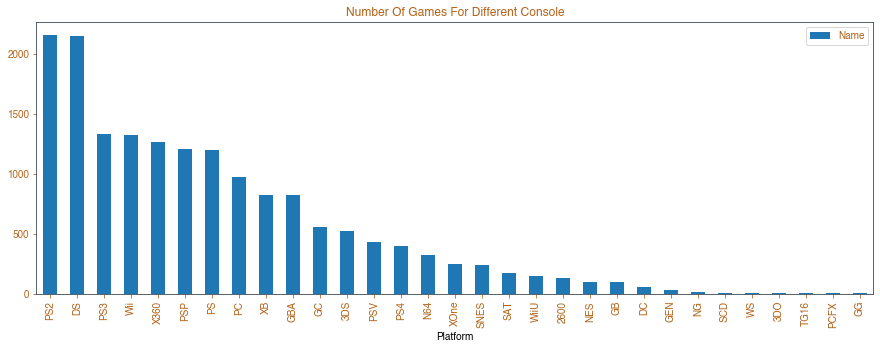

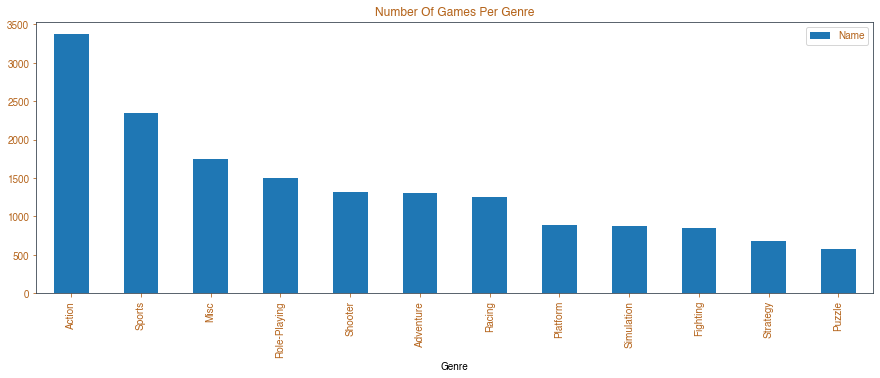

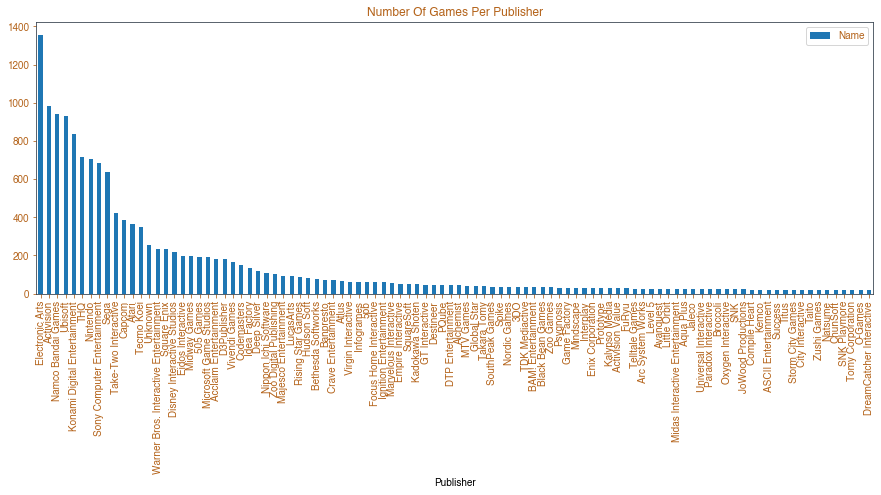

In [188]:

#Plot Top values in the dataset By platform, developer and genre.
import matplotlib.pyplot as plt
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#b5651d'
plt.rcParams['ytick.color']='#b5651d'
plt.rcParams['text.color']='#b5651d'
plt.rcParams['figure.figsize'] = 15, 5


namePlatformDf = df[['Name', 'Platform']].groupby(['Platform']).count().sort_values('Name', ascending=False).reset_index()
namePlatformDf.plot(kind='bar', x="Platform", y="Name",title="Number Of Games For Different Console")

nameGenreDf = df[['Name', 'Genre']].groupby(['Genre']).count().sort_values('Name', ascending=False).reset_index()
nameGenreDf.plot(kind='bar', x="Genre", y="Name",title="Number Of Games Per Genre")

nameDeveloperDf = df[['Name', 'Publisher']].groupby(['Publisher']).count().sort_values('Name', ascending=False).reset_index()
nameDeveloperDf[:100].plot(kind='bar', x="Publisher", y="Name",title="Number Of Games Per Publisher")



#### DATA CORRELATION

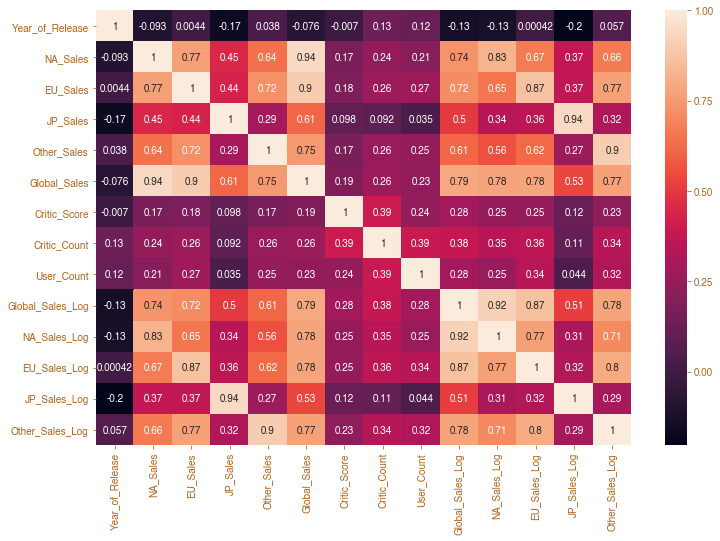

In [189]:
plt.figure(figsize=(12, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [190]:
## UTITLITY FUNCTION FOR PRINTING CLASSIFICATION REPORT

In [191]:
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

In [192]:
## UTITLITY FUNCTION FOR PRINTING CONFUSION MATRIX

In [193]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Source: http://scikit-learn.org/stable/auto_examples/model_selection/
#         plot_confusion_matrix.html#confusion-matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [194]:
# Data Transformation

df.drop(index=[0], inplace=True)

#Transform datatypes：change the datatype：from real number -> integer 
# Transform year from float to integer
df['Year_of_Release'] = df.Year_of_Release.astype(int)

# Transform Critic_Score from float to integer
df['Critic_Score'] = df.Critic_Score.astype(int)

# Transform Critic_Count from float to integer
df['Critic_Count'] = df.Critic_Count.astype(int)

# Transform User_Count from float to integer
df['User_Count'] = df.User_Count.astype(int)


# Transform User_Score to int
df.User_Score = pd.to_numeric(df.User_Score, errors='coerce')


In [195]:
# Categorical encoding and standardization：
# First we will create a new feature, based on the year of release. 
# The new feature 'years_after_release' = year of release - release date of the platform

# Create new, empty column
df['year_after_release'] = ''

# Create variables for all console relese years
PS2_release = 2000
Wii_release = 2006
x2600_release = 1977
X360_release = 2005
GBA_release = 2001
PS3_release = 2006
PS_release = 1994
PSP_release = 2004
XB_release = 2001
GB_release = 1989
DS_release = 2004
x3DS_release = 2011
N64_release = 1996
PSV_release = 2011
GC_release = 2001


def year_after_release_filler(x):
    
        if x.Platform == 'PS2':
            return x.Year_of_Release - PS2_release 
        elif x.Platform == 'Wii':
            return x.Year_of_Release - Wii_release 
        elif x.Platform == '2600':
            return x.Year_of_Release - x2600_release 
        elif x.Platform == 'X360':
            return x.Year_of_Release - X360_release 
        elif x.Platform == 'GBA':
            return x.Year_of_Release - GBA_release 
        elif x.Platform == 'PS3':
            return x.Year_of_Release - PS3_release 
        elif x.Platform == 'PS':
            return x.Year_of_Release - PS_release 
        elif x.Platform == 'PSP':
            return x.Year_of_Release - PSP_release 
        elif x.Platform == 'XB':
            return x.Year_of_Release - XB_release 
        elif x.Platform == 'GB':
            return x.Year_of_Release - GB_release 
        elif x.Platform == 'DS':
            return x.Year_of_Release - DS_release 
        elif x.Platform == '3DS':
            return x.Year_of_Release - x3DS_release 
        elif x.Platform == 'N64':
            return x.Year_of_Release - N64_release 
        elif x.Platform == 'PSV':
            return x.Year_of_Release - PSV_release 
        elif x.Platform == 'GC':
            return x.Year_of_Release - GC_release 
        else:
            return 1

        
df.year_after_release = df.apply(year_after_release_filler, axis=1)
df.drop(index=[15959],inplace=True)
df[df['year_after_release'] <0]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Rating,Global_Sales_Log,NA_Sales_Log,EU_Sales_Log,JP_Sales_Log,Other_Sales_Log,year_after_release
1340,Disney's DuckTales,GB,1988,Platform,Capcom,0.82,0.23,0.35,0.03,1.43,...,21,0.0,24,Unknown,0.887891,0.598837,0.207014,0.300105,0.029559,-1
2076,NFL Fever 2002,XB,2000,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99,...,24,8.5,10,E,0.688135,0.553885,0.190620,0.000000,0.039221,-1
12301,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,Konami Digital Entertainment,0.05,0.02,0.00,0.00,0.06,...,21,0.0,24,Unknown,0.058269,0.048790,0.019803,0.000000,0.000000,-1


### Learning(Training) and Evaluation(Testing)
### Split Train Cases and Test Cases

In [196]:
# Split training-test data
# For the first ML models, we will use 'Global_Sales_Log' as the target variable.

# Standardizing numerical features
# User_Score features that need to be standardized are: Critic_Score, Critic_Count, User_Count, year_after_release

df10=df

# Encoding categorical features
# We will now create dummy variables for Platform, Genre, Publisher and Rating.

df_dummies = pd.get_dummies(df10[['Platform','Genre','Publisher','Rating']], drop_first = True)
# Merge the dummies dataframe with the original dataframe
df10 = pd.merge(df_dummies, df10, left_index=True, right_index=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print(df10.columns)
scaled_features = scaler.fit_transform(df10[['Critic_Score', 'Critic_Count','User_Score','User_Count','year_after_release']])
scaled_df = pd.DataFrame(scaled_features, columns=['Critic_Score', 'Critic_Count','User_Score','User_Count','year_after_release'])

df10 = pd.merge(scaled_df, df, left_index=True, right_index=True)


# # Drop original non-standardized features
columns = ['Critic_Score_y', 'Critic_Count_y','User_Score_y','User_Count_y','NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales','year_after_release_y']
df10.drop(columns, inplace=True, axis=1)

X = df10.drop(['Global_Sales_Log','NA_Sales_Log','EU_Sales_Log','JP_Sales_Log','Other_Sales_Log'], axis=1)
y = df10['Global_Sales_Log']
X=df10[['Critic_Score_x', 'Critic_Count_x', 'User_Score_x', 'User_Count_x', 'year_after_release_x', 'NA_Sales_Log']]


Index(['Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN',
       'Platform_GG', 'Platform_N64',
       ...
       'Critic_Count', 'User_Score', 'User_Count', 'Rating',
       'Global_Sales_Log', 'NA_Sales_Log', 'EU_Sales_Log', 'JP_Sales_Log',
       'Other_Sales_Log', 'year_after_release'],
      dtype='object', length=649)


In [197]:
##Learning and evaluation

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve



## 1.First ML Problem
#### X=> Critic_Score_x', 'Critic_Count_x', 'User_Score_x', 'User_Count_x', 'year_after_release_x'
#### y=> Global_Sales_Log

#### 1.Linear Regression


accuracy :0.8523184660252421
mean_absolute_error :0.09902835743695935
mean_squared_error :0.02286022063308966
variance_score :0.8523184741545611


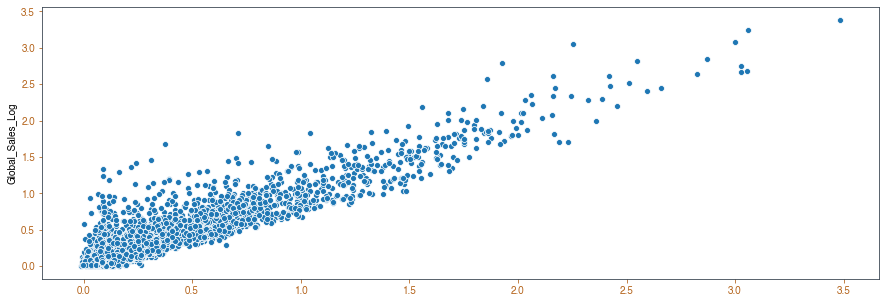

In [222]:
# 1.Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
# Evaluate model
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error

sns.scatterplot(lr_predictions,y_test)

MAE_lr = mean_absolute_error(y_test, lr_predictions)
MSE_lr = mean_squared_error(y_test, lr_predictions)
var_lr = explained_variance_score(y_test, lr_predictions)

print("accuracy :" + str(lr.score(X_test,y_test)))
print("mean_absolute_error :" + str(MAE_lr))
print("mean_squared_error :" + str(MSE_lr))
print("variance_score :" + str(var_lr))

#### 2. Ridge Regression


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8434304695922168
{'alpha': 0.1, 'normalize': False, 'tol': 1e-06}
mean_absolute_error :0.09908128080265304
mean_squared_error :0.022863384030535606
variance :0.8522980350467355
accuracy :0.8522980298538295


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.3s finished


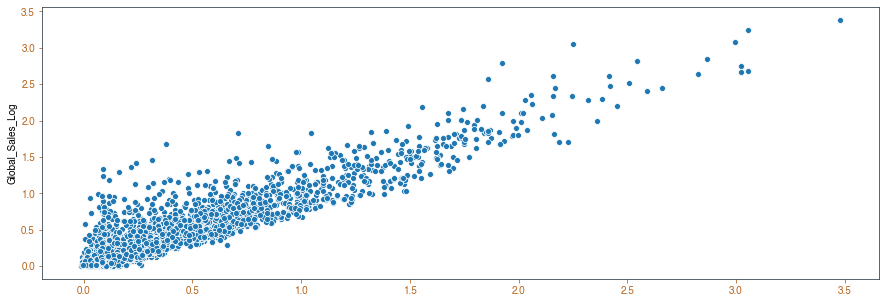

In [223]:
# 2. Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_ridge.fit(X_train, y_train)

print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

ridge_optimized = Ridge(alpha= 1, normalize= False, tol=1e-06)

ridge_optimized.fit(X_train,y_train)

ridge_pred = ridge_optimized.predict(X_test)

MAE_ridge = mean_absolute_error(y_test, ridge_pred)
MSE_ridge = mean_squared_error(y_test, ridge_pred)
var_ridge = explained_variance_score(y_test, ridge_pred)
print("mean_absolute_error :" + str(MAE_ridge))
print("mean_squared_error :" + str(MSE_ridge))
print("variance :" + str(var_ridge))
print("accuracy :" + str(ridge_optimized.score(X_test,y_test)))
sns.scatterplot(ridge_pred,y_test)

#### 3. RandomForest Regression 

In [226]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)
MAE_rf = mean_absolute_error(y_test, rf_predictions)
MSE_rf = mean_squared_error(y_test, rf_predictions)
print("mae: " + str(MAE_rf))
print("mse: " + str(MSE_rf))
print("accuracy :" + str(rf.score(X_test,y_test)))
print("variance :" + str(explained_variance_score(y_test, rf_predictions)))


mae: 0.09884309984717227
mse: 0.02510867527810916
accuracy :0.8377930055592785
variance :0.8379337860864112


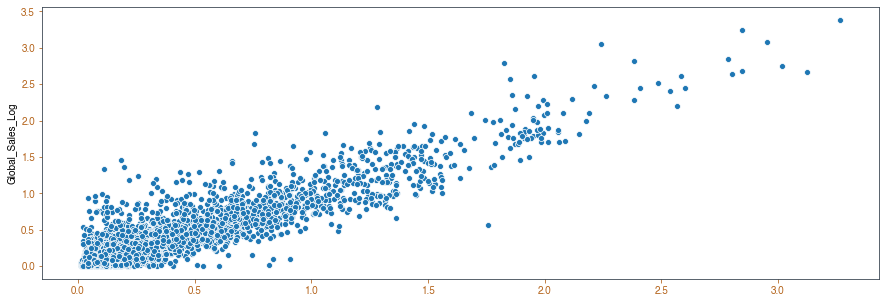

In [201]:
sns.scatterplot(rf_predictions,y_test)

### Evaluate different models

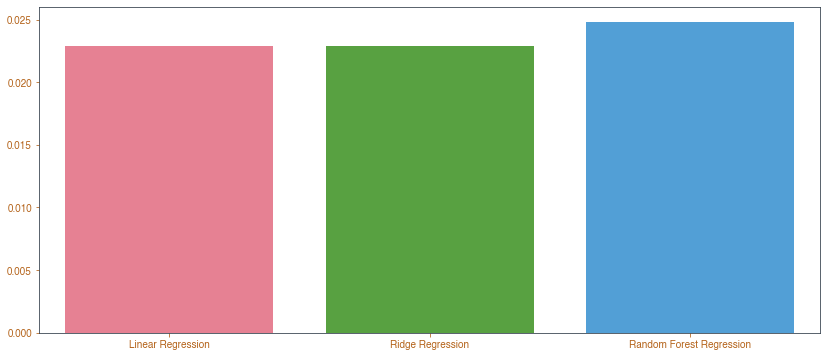

In [202]:
# # Comparison of MSE of the models
MSEs = [0.022860,0.022863,0.02479]

models = ['Linear Regression','Ridge Regression','Random Forest Regression']
plt.figure(figsize=(14,6))
sns.barplot(models,MSEs,palette='husl')

### 2. Second ML Problem
#### X=> Year_of_Release Critic_Score
#### y=> Hit

### RandomForestClassifier,LogisticRegression

In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

dfa= df.copy()
dfb = dfa[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)


def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

df3 = df2[['Year_of_Release','Critic_Score','Hit']]
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

print('X Year_of_Release Critic_Score')
print('Y Hit')

radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
ypred3 = radm.predict(Xtest)

print("Validation accuracy with RandomForestClassifier: %0.2f" %(accuracy_score(ytest, ypred3)))

MAE_rf = mean_absolute_error(ytest, ypred3)
MSE_rf = mean_squared_error(ytest, ypred3)
print("mae for RandomForestClassifier: " + str(MAE_rf))
print("mse for RandomForestClassifier: " + str(MSE_rf))
print("accuracy for RandomForestClassifier:" + str(radm.score(Xtest,ytest)))
print("variance for RandomForestClassifier :" + str(explained_variance_score(ytest, ypred3)))

log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
ypred = log_reg.predict(Xtest)

print("Validation accuracy with LogisticRegression: %0.2f" %(accuracy_score(ytest, ypred)))

print('Regression on training set:',log_reg.score(Xtrain, ytrain))
print('Regression Score on test set:',log_reg.score(Xtest, ytest))

print("mae for LogisticRegression: " + str(mean_absolute_error(ytest, ypred)))
print("mse for LogisticRegression: " + str(mean_squared_error(ytest, ypred)))
print("accuracy for LogisticRegression:" + str(log_reg.score(Xtest,ytest)))
print("variance for LogisticRegression :" + str(explained_variance_score(ytest, ypred)))


from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model = LR.fit(Xtrain, ytrain)
pd.DataFrame({'features': df3.columns, 'estimatedCoefficients': model.coef_})[['features', 'estimatedCoefficients']].sort_values(by='estimatedCoefficients', ascending=False)

X Year_of_Release Critic_Score
Y Hit
Validation accuracy with RandomForestClassifier: 0.82
mae for RandomForestClassifier: 0.18015534953645704
mse for RandomForestClassifier: 0.18015534953645704
accuracy for RandomForestClassifier:0.8198446504635429
variance for RandomForestClassifier :-0.20697724448893373
Validation accuracy with LogisticRegression: 0.83
Regression on training set: 0.8466549736908043
Regression Score on test set: 0.8338762214983714
mae for LogisticRegression: 0.16612377850162866
mse for LogisticRegression: 0.16612377850162866
accuracy for LogisticRegression:0.8338762214983714
variance for LogisticRegression :0.014201230193749192


,features,estimatedCoefficients
1,Critic_Score,0.008154
0,Year_of_Release,0.002191


#### Confusion Matrix, Classification Report,ROC curve

Confusion Matrix
[[7257   37]
 [ 983   81]]
Confusion matrix, without normalization
[[7257   37]
 [ 983   81]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7294
           1       0.69      0.08      0.14      1064

    accuracy                           0.88      8358
   macro avg       0.78      0.54      0.54      8358
weighted avg       0.86      0.88      0.83      8358

Logistic AUC = 0.54
[0.1  0.09 0.05 0.16 0.1 ]


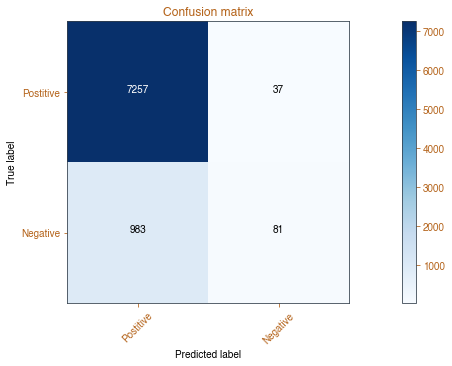

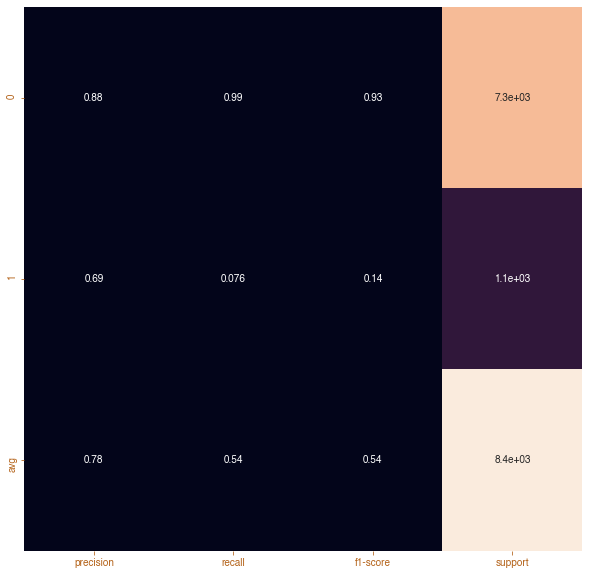

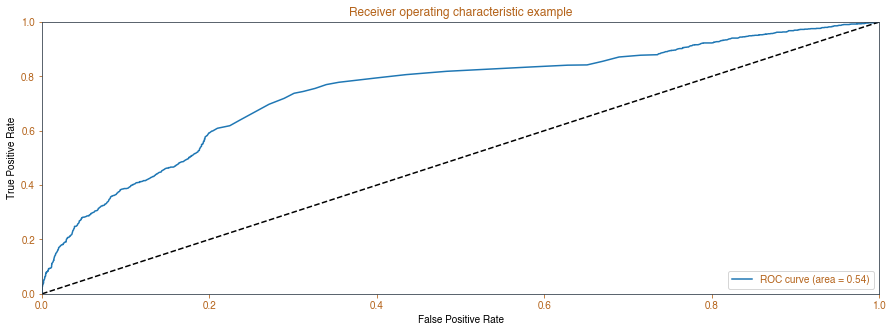

In [204]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

ypred = log_reg.predict(Xtest)
print("Confusion Matrix")
print(confusion_matrix(ytest, ypred))
cm = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=["Postitive", "Negative"],
                      title='Confusion matrix')

print("Classification Report")
print(classification_report(ytest, ypred))
plot_classification_report(ytest, ypred)

logit_roc_auc = roc_auc_score(ytest, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)

b = log_reg.predict_proba(Xtest)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(ytest, b)

# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



#### Data Analysis for Ratings. Encoding Ratings and clean up.

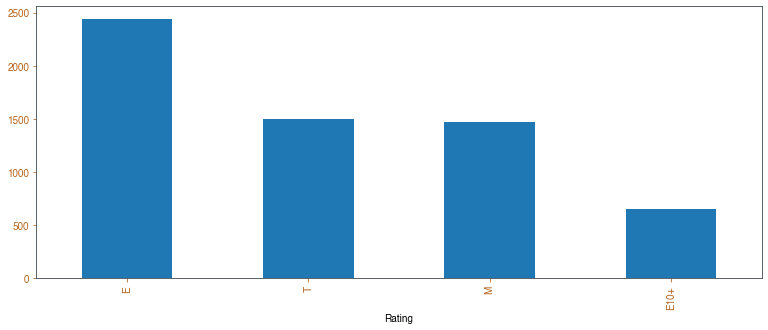

In [205]:
    df = pd.read_csv('Video_Games_Sales.csv', encoding="utf-8")   
    df = df[df.Rating != "RP"]
    df = df[df.Rating != "EC"]
    df = df[df.Rating != "AO"]
    df = df[df.Rating != "K-A"]

    ax = df.groupby('Rating').sum().unstack().Global_Sales.sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                                          figsize=(
                                                                                                           13, 5));

In [206]:
    df = pd.read_csv('Video_Games_Sales.csv', encoding="utf-8")
    df = df[df.Platform != "2600"]
    df = df[df.Platform != "3DO"]
    df = df[df.Platform != "DC"]
    df = df[df.Platform != "GEN"]
    df = df[df.Platform != "GG"]
    df = df[df.Platform != "NG"]
    df = df[df.Platform != "PCFX"]
    df = df[df.Platform != "SAT"]
    df = df[df.Platform != "SCD"]
    df = df[df.Platform != "TG16"]
    df = df[df.Platform != "WS"]


    df = df[df.User_Score != "tbd"]
    df = df.dropna().reset_index(drop=True)

    df["Platform_XB"] = 0
    df["Platform_X360"] = 0
    df["Platform_XOne"] = 0
    df["Platform_PC"] = 0
    df["Platform_PS"] = 0
    df["Platform_PS2"] = 0
    df["Platform_PS3"] = 0
    df["Platform_PS4"] = 0
    df["Platform_PSP"] = 0
    df["Platform_PSV"] = 0
    df["Platform_GB"] = 0
    df["Platform_GBA"] = 0
    df["Platform_DS"] = 0
    df["Platform_3DS"] = 0
    df["Platform_NES"] = 0
    df["Platform_SNES"] = 0
    df["Platform_N64"] = 0
    df["Platform_GC"] = 0
    df["Platform_Wii"] = 0
    df["Platform_WiiU"] = 0

    for elem in df.index.get_values():
        if df.get_value(elem, "Platform") == "XB": df.set_value(elem, "Platform_XB", 1)
        if df.get_value(elem, "Platform") == "X360": df.set_value(elem, "Platform_X360", 1)
        if df.get_value(elem, "Platform") == "XOne": df.set_value(elem, "Platform_XOne", 1)
        if df.get_value(elem, "Platform") == "PS": df.set_value(elem, "Platform_PS", 1)
        if df.get_value(elem, "Platform") == "PS2": df.set_value(elem, "Platform_PS2", 1)
        if df.get_value(elem, "Platform") == "PS3": df.set_value(elem, "Platform_PS3", 1)
        if df.get_value(elem, "Platform") == "PS4": df.set_value(elem, "Platform_PS4", 1)
        if df.get_value(elem, "Platform") == "PSP": df.set_value(elem, "Platform_PSP", 1)
        if df.get_value(elem, "Platform") == "PSV": df.set_value(elem, "Platform_PSV", 1)
        if df.get_value(elem, "Platform") == "GB": df.set_value(elem, "Platform_GB", 1)
        if df.get_value(elem, "Platform") == "GBA": df.set_value(elem, "Platform_GBA", 1)
        if df.get_value(elem, "Platform") == "DS": df.set_value(elem, "Platform_DS", 1)
        if df.get_value(elem, "Platform") == "3DS": df.set_value(elem, "Platform_3DS", 1)
        if df.get_value(elem, "Platform") == "NES": df.set_value(elem, "Platform_NES", 1)
        if df.get_value(elem, "Platform") == "SNES": df.set_value(elem, "Platform_SNES", 1)
        if df.get_value(elem, "Platform") == "N64": df.set_value(elem, "Platform_N64", 1)
        if df.get_value(elem, "Platform") == "GC": df.set_value(elem, "Platform_GC", 1)
        if df.get_value(elem, "Platform") == "Wii": df.set_value(elem, "Platform_Wii", 1)
        if df.get_value(elem, "Platform") == "WiiU": df.set_value(elem, "Platform_WiiU", 1)

    # Discretizzazione feature Genre

    df["Genre_Action"] = 0
    df["Genre_Adventure"] = 0
    df["Genre_Fighting"] = 0
    df["Genre_Misc"] = 0
    df["Genre_Platform"] = 0
    df["Genre_Puzzle"] = 0
    df["Genre_Shooter"] = 0
    df["Genre_Sports"] = 0
    df["Genre_Simulation"] = 0
    df["Genre_Strategy"] = 0
    df["Genre_Racing"] = 0
    df["Genre_Role-Playing"] = 0

    for elem in df.index.get_values():
        if df.get_value(elem, "Genre") == "Action": df.set_value(elem, "Genre_Action", 1)
        if df.get_value(elem, "Genre") == "Adventure": df.set_value(elem, "Genre_Adventure", 1)
        if df.get_value(elem, "Genre") == "Fighting": df.set_value(elem, "Genre_Fighting", 1)
        if df.get_value(elem, "Genre") == "Misc": df.set_value(elem, "Genre_Misc", 1)
        if df.get_value(elem, "Genre") == "Platform": df.set_value(elem, "Genre_Platform", 1)
        if df.get_value(elem, "Genre") == "Puzzle": df.set_value(elem, "Genre_Puzzle", 1)
        if df.get_value(elem, "Genre") == "Shooter": df.set_value(elem, "Genre_Shooter", 1)
        if df.get_value(elem, "Genre") == "Sports": df.set_value(elem, "Genre_Sports", 1)
        if df.get_value(elem, "Genre") == "Simulation": df.set_value(elem, "Genre_Simulation", 1)
        if df.get_value(elem, "Genre") == "Strategy": df.set_value(elem, "Genre_Strategy", 1)
        if df.get_value(elem, "Genre") == "Racing": df.set_value(elem, "Genre_Racing", 1)
        if df.get_value(elem, "Genre") == "Role-Playing": df.set_value(elem, "Genre_Role-Playing", 1)

            
    df["Rating_Everyone"] = 0
    df["Rating_Everyone10"] = 0
    df["Rating_Teen"] = 0
    df["Rating_Mature"] = 0
    df["Rating_Adult"] = 0

    for elem in df.index.get_values():
        if df.get_value(elem, "Rating") == "E": df.set_value(elem, "Rating_Everyone", 1)
        if df.get_value(elem, "Rating") == "E10+": df.set_value(elem, "Rating_Everyone10", 1)
        if df.get_value(elem, "Rating") == "T": df.set_value(elem, "Rating_Teen", 1)
        if df.get_value(elem, "Rating") == "M": df.set_value(elem, "Rating_Mature", 1)
        if df.get_value(elem, "Rating") == "AO": df.set_value(elem, "Rating_Adult", 1)

    # Discretizzazione feature Publisher

    publisher_list = []

    for elem in df.Publisher:
        if elem not in publisher_list:
            publisher_list.append(elem)

    for elem in publisher_list:
        df[elem] = 0

    for elem in df.index.get_values():
        df.set_value(elem, df.get_value(elem, "Publisher"), 1)

    # Discretizzazione feature Developer

    developer_list = []

    for elem in df.Developer:
        if elem not in developer_list:
            developer_list.append(elem)

    for elem in developer_list:
        df[elem] = 0

    for elem in df.index.get_values():
        df.set_value(elem, df.get_value(elem, "Developer"), 1)


    df = df[df.Rating != 'AO']
    df = df[df.Rating != 'K-A']
    df = df[df.Rating != 'RP']
    df = df[df.Rating != 'EC']


    del df['User_Score']
    del df['User_Count']
    del df['Critic_Score']
    del df['Critic_Count']

    del df['Platform']
    del df['Genre']
    del df['Publisher']
    del df['Developer']


    del df['Rating_Adult']

    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)

    y_true = np.array(df['Rating'])
    vector_names = np.array(df['Name'])
    del df['Name']
    
    y_true_int = np.empty(len(y_true), dtype=int)
    i = 0
    for elem in y_true:
        if elem == "E":
            y_true_int[i] = 1
        elif elem == "E10+":
            y_true_int[i] = 2
        elif elem == "T":
            y_true_int[i] = 3
        else:
            y_true_int[i] = 4
        i += 1

    del df['Rating']

    df = df.astype('float64')

    print(" Dataset Analysis  ")

    print_e = df["Rating_Everyone"].value_counts()[1]
    print_e10 = df["Rating_Everyone10"].value_counts()[1]
    print_teen = df["Rating_Teen"].value_counts()[1]
    print_mature = df["Rating_Mature"].value_counts()[1]

    print("Number of elements: " + str(print_e + print_e10 + print_teen + print_mature) + "\n")

    df_stampa = pd.DataFrame({"Rating": ['Everyone', 'Everyone 10+', 'Teen', 'Mature'],
                              "Counts": [print_e, print_e10, print_teen, print_mature]})

    cols = df_stampa.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_stampa = df_stampa[cols]

    print(df_stampa)

 Dataset Analysis  
Number of elements: 6808

   Counts        Rating
0    2079      Everyone
1     930  Everyone 10+
2    2367          Teen
3    1432        Mature


#### Utility Function for plot_learning_curve.

In [207]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="train_scores_mean")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test_scores_mean")

    plt.legend(loc="best")
    return plt


In [208]:
### 3. Third ML Problem
#### X=> Year_of_Release Sales Platform
#### y=> RATING EVERYONE

In [209]:
#### Random Forest

RATING EVERYONE
Random Forest: 


<module 'matplotlib.pyplot' from '/Users/nselvarajan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

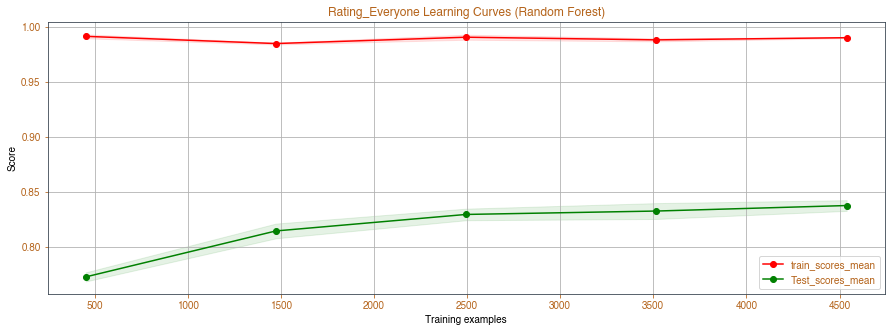

In [210]:
    from sklearn.model_selection import learning_curve
    import pandas as pd
    import numpy as np
    import seaborn as sns

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import VotingClassifier

    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt

    print("RATING EVERYONE")

    df2 = df
    y = df2['Rating_Everyone'].values
    df2 = df2.drop(['Rating_Everyone'], axis=1)
    df2 = df2.drop(['Rating_Everyone10'], axis=1)
    df2 = df2.drop(['Rating_Teen'], axis=1)
    df2 = df2.drop(['Rating_Mature'], axis=1)
    X = df2.values
    
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
    
    
    print("Random Forest: ")
    plot_learning_curve(RandomForestClassifier(), "Rating_Everyone Learning Curves (Random Forest)", X, y,
                            n_jobs=-1)


#### k-NN

k-NN: 


<module 'matplotlib.pyplot' from '/Users/nselvarajan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

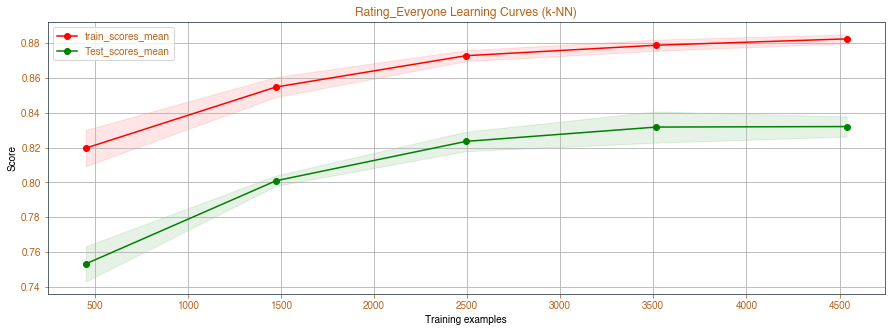

In [211]:
print("k-NN: ")
plot_learning_curve(KNeighborsClassifier(), "Rating_Everyone Learning Curves (k-NN)", X, y, n_jobs=-1)

#### LogisticRegression

In [232]:

    log_reg1 = LogisticRegression(penalty='l1', dual=False, C=1.0, fit_intercept=True, intercept_scaling=1,
                                  class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                                  multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
    log_reg1.fit(Xtrain, ytrain)
    y_val_l = log_reg1.predict(Xtest)
    ris = accuracy_score(ytest, y_val_l)
    mis = accuracy_score(ytest, y_val_l, normalize=False)

    print("Logistic Regression Rating_Everyone accuracy: ", ris)
    print("Logistic Regression Rating_Everyone misclassification: ", ytest.size - mis)
    MAE_rf = mean_absolute_error(ytest, y_val_l)
    MSE_rf = mean_squared_error(ytest, y_val_l)
    print("mae for Logistic Regression: " + str(MAE_rf))
    print("mse for Logistic Regression: " + str(MSE_rf))
    print("accuracy for Logistic Regression:" + str(log_reg1.score(Xtest,y_val_l)))
    print("variance for Logistic Regression :" + str(explained_variance_score(ytest, y_val_l)))

Logistic Regression Rating_Everyone accuracy:  0.8333750939614132
Logistic Regression Rating_Everyone misclassification:  665
mae for Logistic Regression: 0.16662490603858682
mse for Logistic Regression: 0.16662490603858682
accuracy for Logistic Regression:0.8333750939614132
variance for Logistic Regression :0.011810211222773925


#### RandomForestClassifier

In [233]:
    radm1 = RandomForestClassifier(n_estimators=240, criterion='gini', max_depth=None, min_samples_split=2,
                                   min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                                   min_impurity_split=1e-07, bootstrap=True,
                                   oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False,
                                   class_weight=None)
    radm1.fit(Xtrain, ytrain)
    y_val_l = radm1.predict(Xtest)
    ris = accuracy_score(ytest, y_val_l)
    mis = accuracy_score(ytest, y_val_l, normalize=False)
    print("Random Forest Rating_Everyone accuracy: ", ris)
    print("Random Forest Rating_Everyone misclassification: ", ytest.size - mis)
    MAE_rf = mean_absolute_error(ytest, y_val_l)
    MSE_rf = mean_squared_error(ytest, y_val_l)
    print("mae for RandomForestClassifier: " + str(MAE_rf))
    print("mse for RandomForestClassifier: " + str(MSE_rf))
    print("accuracy for RandomForestClassifier:" + str(radm1.score(Xtest,ytest)))
    print("variance for RandomForestClassifier :" + str(explained_variance_score(ytest, y_val_l)))


Random Forest Rating_Everyone accuracy:  0.8153345026309196
Random Forest Rating_Everyone misclassification:  737
mae for RandomForestClassifier: 0.18466549736908044
mse for RandomForestClassifier: 0.18466549736908044
accuracy for RandomForestClassifier:0.8153345026309196
variance for RandomForestClassifier :-0.24269676733883894


#### KNeighborsClassifier

In [237]:
    knn1 = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=30, p=1,
                                metric='minkowski', metric_params=None, n_jobs=1)
    knn1.fit(Xtrain, ytrain)
    y_val_l = knn1.predict(Xtest)
    ris = accuracy_score(ytest, y_val_l)
    mis = accuracy_score(ytest, y_val_l, normalize=False)
    print("K-Nearest Neighbors Rating_Everyone accuracy: ", ris)
    print("K-Nearest Neighbors Rating_Everyone misclassification: ", ytest.size - mis)
    print("K-Nearest Neighbors Rating_Everyone accuracy: ", ris)
    print("K-Nearest Neighbors Rating_Everyone misclassification: ", ytest.size - mis)
    MAE_rf = mean_absolute_error(ytest, y_val_l)
    MSE_rf = mean_squared_error(ytest, y_val_l)
    print("mae for K-Nearest Neighbors: " + str(MAE_rf))
    print("mse for K-Nearest Neighbors: " + str(MSE_rf))
    print("accuracy for K-Nearest Neighbors:" + str(ris))
    print("variance for K-Nearest Neighbors :" + str(explained_variance_score(ytest, y_val_l)))

    print("\n")

K-Nearest Neighbors Rating_Everyone accuracy:  0.8376346780255575
K-Nearest Neighbors Rating_Everyone misclassification:  648
K-Nearest Neighbors Rating_Everyone accuracy:  0.8376346780255575
K-Nearest Neighbors Rating_Everyone misclassification:  648
mae for K-Nearest Neighbors: 0.1623653219744425
mse for K-Nearest Neighbors: 0.1623653219744425
accuracy for K-Nearest Neighbors:0.8376346780255575
variance for K-Nearest Neighbors :-0.03927400129078129




#### Evaluate Different Models

In [215]:

    for clf, label in zip([log_reg1, radm1, knn1], ['Logistic Regression', 'Random Forest', 'k-NN']):
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        print("Accuracy Score: %0.5f [%s]" % (scores.mean(), label))    

Accuracy Score: 0.85165 [Logistic Regression]
Accuracy Score: 0.85899 [Random Forest]
Accuracy Score: 0.83681 [k-NN]


## Comparison of Accuracy of the models


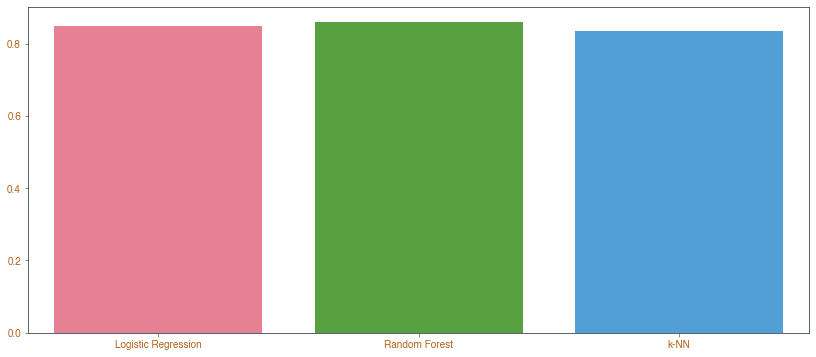

In [216]:
# # Comparison of Accuracy of the models
MSEs = [0.84768,0.85913,0.83519]

models = ['Logistic Regression','Random Forest','k-NN']
plt.figure(figsize=(14,6))
sns.barplot(models,MSEs,palette='husl')